In [2]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import numpy as np
pd.set_option('display.max_rows', None)
label_encoder = LabelEncoder()

In [3]:
df = pd.read_csv("../data/raw/train.csv")
#Primero vamos a revisarlo.

In [4]:
#esa cantidad de nans es mala, lo mejor es depurarla columna por columna.
df.isna().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [5]:
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [6]:
#De aqui lo mejor es el total de transportados.
#Dicho total esta equilibrado, mucho mas no hay que hacer por aqui.
for i in df.columns:
    print(df[i].value_counts())

PassengerId
0001_01    1
6136_01    1
6141_01    1
6139_06    1
6139_05    1
6139_04    1
6139_03    1
6139_02    1
6139_01    1
6138_01    1
6137_06    1
6137_05    1
6137_04    1
6137_03    1
6137_02    1
6137_01    1
6135_01    1
6143_01    1
6133_01    1
6132_01    1
6130_01    1
6128_02    1
6128_01    1
6127_01    1
6126_01    1
6124_01    1
6123_01    1
6122_01    1
6121_02    1
6121_01    1
6120_01    1
6118_02    1
6141_02    1
6145_01    1
6117_01    1
6168_01    1
6178_01    1
6176_01    1
6175_03    1
6175_02    1
6175_01    1
6174_03    1
6174_02    1
6174_01    1
6173_01    1
6172_01    1
6171_01    1
6170_01    1
6169_01    1
6168_02    1
6167_01    1
6146_01    1
6166_01    1
6163_01    1
6162_01    1
6158_01    1
6157_01    1
6156_01    1
6155_01    1
6153_01    1
6152_02    1
6152_01    1
6150_01    1
6149_01    1
6148_02    1
6148_01    1
6118_01    1
6116_01    1
6180_01    1
6065_01    1
6082_01    1
6080_01    1
6077_01    1
6076_01    1
6075_01    1
6073_01    1


In [7]:
#Esto es una prueba con Spa en 0.0, no veo aqui nada de especial.
df_prueba = df[df["Spa"] == 0.0]

for i in df_prueba:
    print(df_prueba[i].value_counts())

PassengerId
0001_01    1
6149_01    1
6148_01    1
6146_01    1
6139_06    1
6139_05    1
6139_04    1
6139_02    1
6139_01    1
6137_06    1
6137_05    1
6137_04    1
6137_03    1
6137_02    1
6137_01    1
6135_01    1
6133_01    1
6132_01    1
6128_02    1
6148_02    1
6152_01    1
6126_01    1
6153_01    1
6184_01    1
6182_01    1
6180_01    1
6179_01    1
6178_01    1
6176_01    1
6175_02    1
6174_03    1
6174_02    1
6173_01    1
6172_01    1
6170_01    1
6168_02    1
6168_01    1
6167_01    1
6166_01    1
6158_01    1
6128_01    1
6124_01    1
6334_04    1
6091_01    1
6085_01    1
6082_01    1
6077_01    1
6075_01    1
6073_01    1
6068_01    1
6066_03    1
6065_01    1
6062_02    1
6062_01    1
6059_01    1
6058_01    1
6055_02    1
6054_01    1
6052_01    1
6049_01    1
6048_01    1
6090_01    1
6092_02    1
6123_01    1
6092_03    1
6122_01    1
6118_02    1
6112_01    1
6111_04    1
6111_03    1
6111_01    1
6110_01    1
6109_02    1
6106_01    1
6103_01    1
6099_01    1


In [8]:
#Por el momento quitaremos las irrelevantes, pero mantendre la df original por si es necesaria.
df_train = df.drop(["Name", "PassengerId","Cabin"], axis =1)

In [9]:
df_train.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True


In [10]:
df_train.dtypes

HomePlanet       object
CryoSleep        object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Transported        bool
dtype: object

In [11]:
df_train.isna().sum()

HomePlanet      201
CryoSleep       217
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Transported       0
dtype: int64

In [12]:
#tratamiento de nans

#En general, le proceso para cada columna ha sido revisarla en solitario, ver valores unicos y cuantos de cada tipo, intentando buscar relaciones que pudiesen aportar información.

#Le aplicamos Unknown, de esta forma los tenemos como un tercer tipo.
df_train['HomePlanet'].fillna('Unknown', inplace=True)
#No veo relacion como tal, de momento lo dejamos como la mayoria de resultados (False)
df_train['CryoSleep'].fillna(False, inplace=True)
#Al no haber relacion como tal y estar los transportados equilibrados, pondre "Unknown"
df_train['Destination'].fillna('Unknown', inplace=True)
#Tras analizar la media de la edad, no hay cambios entre inferior o superior a la media y los Transportados estan igualados.
#Pondré los nan con la media de la edad.
media = df_train["Age"].mean()
df_train['Age'].fillna(media, inplace=True)
#De los aprox 8000, solo hay 199 vips, pasamos los NAN como false.
df_train['VIP'].fillna(False, inplace=True)
#Para Room Service usaremos la moda, es el valor mas comun y posiblemente el mas acertado.
moda = df_train['RoomService'].mode().iloc[0]
df_train['RoomService'].fillna(moda, inplace=True)
#Foodcourt es lo mismo, tambien usaremos la moda.
moda = df_train['FoodCourt'].mode().iloc[0]
df_train['FoodCourt'].fillna(moda, inplace=True)
#Igual para ShoppingMall
moda = df_train['ShoppingMall'].mode().iloc[0]
df_train['ShoppingMall'].fillna(moda, inplace=True)
#Seguimos con el resto
moda = df_train['Spa'].mode().iloc[0]
df_train['Spa'].fillna(moda, inplace=True)
#Igual para ShoppingMall
moda = df_train['VRDeck'].mode().iloc[0]
df_train['VRDeck'].fillna(moda, inplace=True)


In [13]:
#Con los nan ya tratados podemos continuar.
df_train.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True


In [ ]:
plt.figure(figsize=(15, 10))
sns.heatmap(df_train.corr(),annot=True);

In [14]:
#nos faltan correlaciones en el mapa de calor, vamos a probar a añadir columnas.

df_train['Spa_VRDeck_0.0'] = np.where((df_train['Spa'] == 0.0) & (df_train['VRDeck'] == 0.0), True, False)
df_train['all_0.0'] = np.where((df_train['Spa'] == 0.0) & (df_train['VRDeck'] == 0.0) & (df_train['RoomService'] == 0.0) & (df_train['FoodCourt'] == 0.0) & (df_train['ShoppingMall'] == 0.0), True, False)
df_train['Earth_0.0'] = np.where((df_train['HomePlanet'] == "Earth") & (df_train['all_0.0'] == 0.0), True, False)
df_train['TRAPPIST-1e_0.0'] = np.where((df_train['Destination'] == "TRAPPIST-1e") & (df_train['all_0.0'] == 0.0), True, False)

In [15]:
#Convertire todas las columnas con texto a valores numericos gracias a label encoder.
columnas = df_train.select_dtypes(include='object').columns
columnas
for i in columnas:
    df_train[i] = label_encoder.fit_transform(df_train[i])

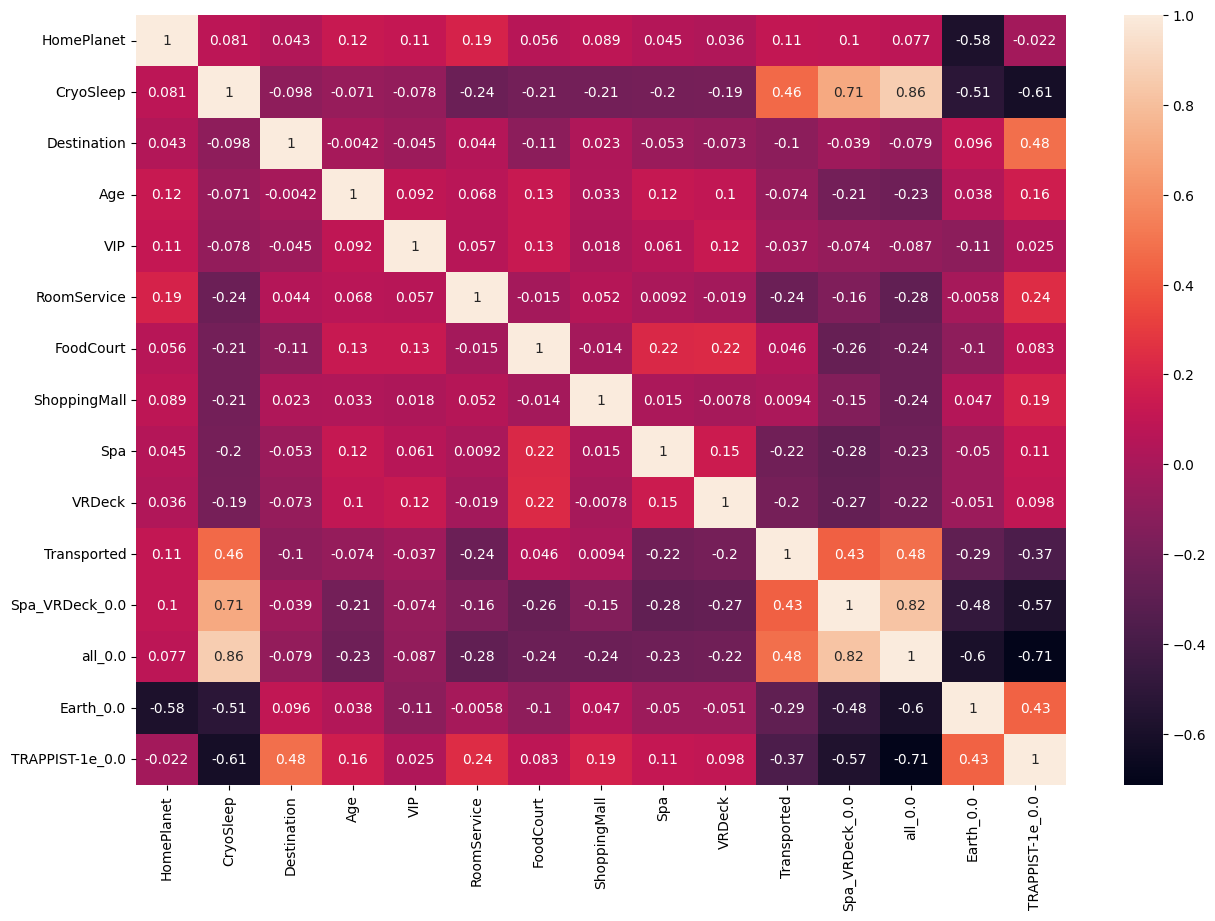

In [16]:
#hemos podido encontrar varias correlaciones, lo cual esta bien.
plt.figure(figsize=(15, 10))
sns.heatmap(df_train.corr(),annot=True);

In [17]:
#Aqui repetire el proceso para test, y asi, poder hacer las predicciones.
df_train.to_csv("../data/processed/train_processed.csv", index=False)

In [18]:
df_test = pd.read_csv("../data/raw/test.csv")

In [19]:
df_test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [20]:
df_test.isna().sum()

PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64

In [21]:
#tratamiento de nans
#Le aplicamos Unknown, de esta forma los tenemos como un tercer tipo.
df_test['HomePlanet'].fillna('Unknown', inplace=True)
#No veo relacion como tal, de momento lo dejamos como la mayoria de resultados (False)
df_test['CryoSleep'].fillna(False, inplace=True)
#Demasiados resultados, imposible encontrar, lo pasamos como "Unknown" y asi no perder info.
df_test['Cabin'].fillna('Unknown', inplace=True)
#Al no haber relacion como tal y estar los transportados equilibrados, pondre "Unknown"
df_test['Destination'].fillna('Unknown', inplace=True)
#Tras analizar la media de la edad, no hay cambios entre inferior o superior a la media y los Transportados estan igualados.
#Pondremos los nan con la media de la edad.
media = df_test["Age"].mean()
df_test['Age'].fillna(media, inplace=True)
#De los aprox 8000, solo hay 199 vips, pasamos los NAN como false.
df_test['VIP'].fillna(False, inplace=True)
#Para Room Service usaremos la moda, es el valor mas comun y posiblemente el mas acertado.
moda = df_test['RoomService'].mode().iloc[0]
df_test['RoomService'].fillna(moda, inplace=True)
#Foodcourt es lo mismo, tambien usaremos la moda.
moda = df_test['FoodCourt'].mode().iloc[0]
df_test['FoodCourt'].fillna(moda, inplace=True)
#Igual para ShoppingMall
moda = df_test['ShoppingMall'].mode().iloc[0]
df_test['ShoppingMall'].fillna(moda, inplace=True)
#Seguimos con el resto
moda = df_test['Spa'].mode().iloc[0]
df_test['Spa'].fillna(moda, inplace=True)
#Igual para ShoppingMall
moda = df_test['VRDeck'].mode().iloc[0]
df_test['VRDeck'].fillna(moda, inplace=True)

In [22]:
df_test['Spa_VRDeck_0.0'] = np.where((df_test['Spa'] == 0.0) & (df_test['VRDeck'] == 0.0), True, False)
df_test['all_0.0'] = np.where((df_test['Spa'] == 0.0) & (df_test['VRDeck'] == 0.0) & (df_test['RoomService'] == 0.0) & (df_test['FoodCourt'] == 0.0) & (df_test['ShoppingMall'] == 0.0), True, False)
df_test['Earth_0.0'] = np.where((df_test['HomePlanet'] == "Earth") & (df_test['all_0.0'] == 0.0), True, False)
df_test['TRAPPIST-1e_0.0'] = np.where((df_test['Destination'] == "TRAPPIST-1e") & (df_test['all_0.0'] == 0.0), True, False)


In [23]:
columnas = df_test.select_dtypes(include='object').columns
columnas
for i in columnas:
    df_test[i] = label_encoder.fit_transform(df_test[i])

In [24]:
df_test.to_csv("../data/processed/test_processed.csv", index=False)